In [25]:
from tqdm import tqdm
import json
import os
import matplotlib.pyplot as plt
from PIL import Image
import random

In [8]:
labels_file = "../input/data/polygons.jsonl"

In [10]:
with open(labels_file, 'r') as json_file:
    # Read each line in the JSON file and parse it as JSON
    json_labels = [json.loads(line) for line in json_file]

In [12]:
json_labels[0]["id"]

'0006ff2aa7cd'

In [13]:
image_dir = "../input/data/train"

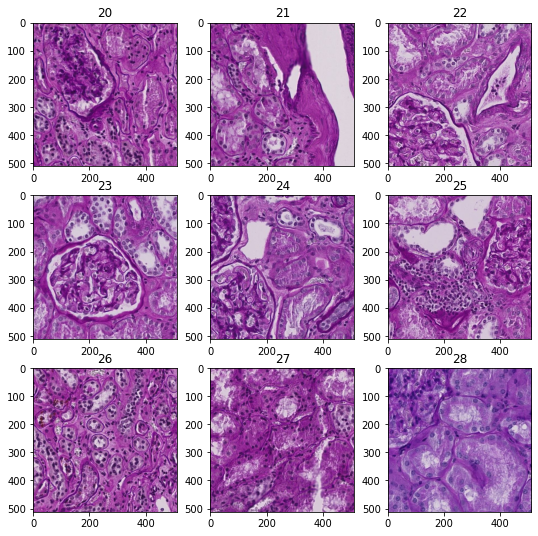

In [46]:
fig, axis = plt.subplots(3, 3, figsize=(9, 9))
c = 20
for i in range(3):
    for j in range(3):
        patient_id = json_labels[c]["id"]
        image_path = os.path.join(image_dir, f"{json_labels[c]['id']}.tif")
        image = Image.open(image_path)
        axis[i][j].imshow(image)
        axis[i][j].set_title(c)
        c += 1

In [24]:
patient_id

'0033bbc76b6b'

In [31]:
train_size = int(0.8 * len(json_labels))

In [23]:
for i, label in enumerate(json_labels):
    patient_id = json_labels[i]["id"]
    if i <= train_size:
        
        
    if i == 2:
        break

In [26]:
random.random()

0.518012598848573

In [32]:
train_size 

1306

In [37]:
import pandas as pd
df = pd.read_json(labels_file, orient="records", lines=True)

In [38]:
df

,id,annotations
0,0006ff2aa7cd,"[{'type': 'glomerulus', 'coordinates': [[[167,..."
1,00168d1b7522,"[{'type': 'glomerulus', 'coordinates': [[[511,..."
2,0033bbc76b6b,"[{'type': 'blood_vessel', 'coordinates': [[[16..."
3,003504460b3a,"[{'type': 'blood_vessel', 'coordinates': [[[40..."
4,004daf1cbe75,"[{'type': 'blood_vessel', 'coordinates': [[[14..."
...,...,...
1628,ff434af74304,"[{'type': 'blood_vessel', 'coordinates': [[[29..."
1629,ff4897b3eda6,"[{'type': 'blood_vessel', 'coordinates': [[[29..."
1630,ff66dec71c4c,"[{'type': 'blood_vessel', 'coordinates': [[[11..."
1631,ff99cdef0f2a,"[{'type': 'blood_vessel', 'coordinates': [[[24..."


In [39]:
from sklearn.model_selection import train_test_split
df_train, df_val = train_test_split(df, test_size=0.2, random_state=42)

In [40]:
df_train 

,id,annotations
63,09e3d02dfd1c,"[{'type': 'blood_vessel', 'coordinates': [[[68..."
812,7f61489d23e1,"[{'type': 'blood_vessel', 'coordinates': [[[49..."
1156,b68a2e3b48bd,"[{'type': 'blood_vessel', 'coordinates': [[[44..."
1043,a4b63d91f173,"[{'type': 'glomerulus', 'coordinates': [[[434,..."
1589,f993befe3cb4,"[{'type': 'blood_vessel', 'coordinates': [[[25..."
...,...,...
1130,b20773efe051,"[{'type': 'blood_vessel', 'coordinates': [[[27..."
1294,cc8d5b6d4975,"[{'type': 'blood_vessel', 'coordinates': [[[51..."
860,866cff076c29,"[{'type': 'blood_vessel', 'coordinates': [[[57..."
1459,e2c1ebfddb4a,"[{'type': 'unsure', 'coordinates': [[[95, 193]..."


In [42]:
df_val

,id,annotations
674,68600400d70b,"[{'type': 'blood_vessel', 'coordinates': [[[31..."
1627,ff30f9fb86ac,"[{'type': 'blood_vessel', 'coordinates': [[[66..."
543,5566406c59ee,"[{'type': 'unsure', 'coordinates': [[[104, 266..."
506,4d5877f68893,"[{'type': 'blood_vessel', 'coordinates': [[[47..."
873,88c95fb9fb14,"[{'type': 'blood_vessel', 'coordinates': [[[23..."
...,...,...
1286,cbce5b55f5bb,"[{'type': 'blood_vessel', 'coordinates': [[[13..."
306,314f2d4952e3,"[{'type': 'blood_vessel', 'coordinates': [[[21..."
192,1e3fe5b348ca,"[{'type': 'blood_vessel', 'coordinates': [[[13..."
309,31aa6f45078f,"[{'type': 'blood_vessel', 'coordinates': [[[42..."


In [43]:
train_labels = "../input/preprocess_data/train_polygons.jsonl"
val_labels = "../input/preprocess_data/val_polygons.jsonl"

In [44]:
df_train.to_json(train_labels, orient="records", force_ascii=False, lines=True)

In [45]:
df_val.to_json(val_labels, orient="records", force_ascii=False, lines=True)